For more information you may want to take a look at [this](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=28089)

In [41]:
%matplotlib inline
from scipy import stats
import datetime
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from scipy.ndimage import gaussian_filter1d

# adjust display settings
%matplotlib inline
plt.rc('figure', figsize=(18, 3))
pd.options.display.max_rows = 8

In [8]:
dt = datetime.datetime(year=2016, month=12, day=19, hour=13, minute=30)
dt

datetime.datetime(2016, 12, 19, 13, 30)

In [9]:
print(dt)

2016-12-19 13:30:00


In [10]:
print(dt.strftime("%d %B %Y"))

19 December 2016


In [11]:
ts = pd.Timestamp('2016-12-19')
ts

Timestamp('2016-12-19 00:00:00')

In [12]:
ts.month

12

In [13]:
ts + pd.Timedelta('5 days')

Timestamp('2016-12-24 00:00:00')

In [14]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [15]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [16]:
pd.to_datetime("09/12/2016", dayfirst=True)

Timestamp('2016-12-09 00:00:00')

In [17]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

In [18]:
s = pd.Series(['2016-12-05 10:00:00', '2016-12-09, 11:00:00', '2016-12-09 12:00:00'])
s

0     2016-12-05 10:00:00
1    2016-12-09, 11:00:00
2     2016-12-09 12:00:00
dtype: object

In [19]:
ts = pd.to_datetime(s)

In [20]:
ts

0   2016-12-05 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

In [21]:
ts.dt.hour

0    10
1    11
2    12
dtype: int64

In [22]:
ts.dt.weekday

0    0
1    4
2    4
dtype: int64

In [23]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3H'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
            ...        
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
Length: 10, dtype: datetime64[ns]

In [25]:
data = pd.read_csv("./datasets/flowdata.csv", index_col=0, parse_dates=True)
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [26]:
data.index.day

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
            ...
            29, 29, 29, 29, 29, 30, 30, 30, 30, 30],
           dtype='int64', name='Time', length=237)

In [27]:
data.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='Time', length=237)

In [28]:
data.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009],
           dtype='int64', name='Time', length=237)

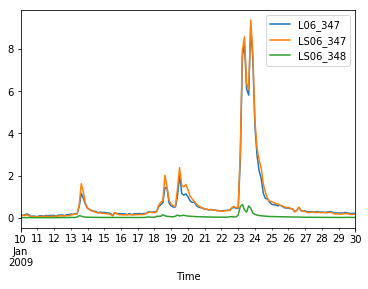

In [31]:
data.plot(xlim=[pd.Timestamp('2009-01-10'), pd.Timestamp('2009-01-30')])

In [32]:
data["2009-01-01 09:00":"2009-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250


In [33]:
data.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


In [34]:
data.resample('D').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


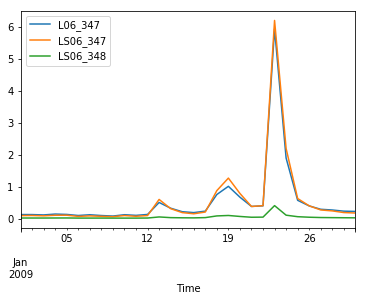

In [35]:
data.resample('D').mean().plot() # 10D

# Time Series: 
## 1+1-D data

engineering, medicine, economy, meteorology, etc.

In [39]:
dataframe = pd.read_csv('./datasets/FEDFUNDS.csv',
                        index_col='DATE',
                        dtype={'FEDFUNDS': np.float32})
# dataframe

X(t) = L + T(t) + C(t) + S(t) + R(t)

- Level
- Trend
- Cyclic
- Seasonal
- random (Residual, Irregular)

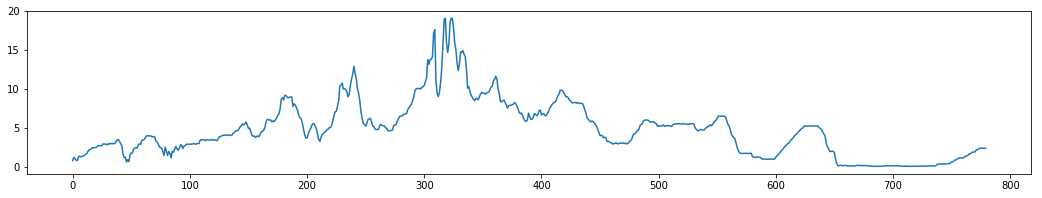

In [43]:
s = pd.Series(dataframe.unstack().values, index=dataframe.index)
X = dataframe.values[:,0]
plt.plot(X)

Detrend:
- stationary, meaning that their average values are (more or less) constant.
- a) It should have constant mean.
- b) It should have constant variance or standard deviation.

Tests to check if a series is stationary or not
- a) Rolling Statistics - Plot the moving avg or moving standard deviation to see if it varies with time. 
Its a visual technique.

Moving Average

$X(t)=Y(t)-m(t)$

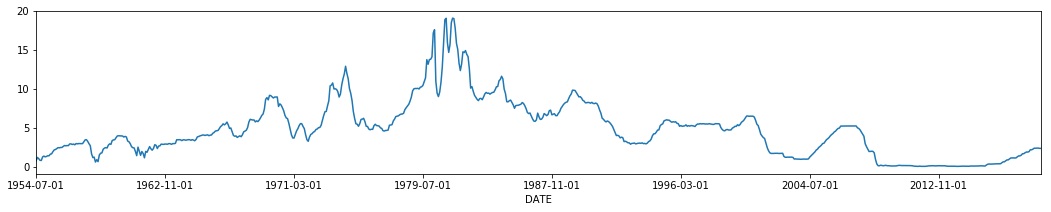

In [78]:
s = pd.Series(dataframe.unstack().values, index=dataframe.index)
X = dataframe.values[:,0]
s.plot()

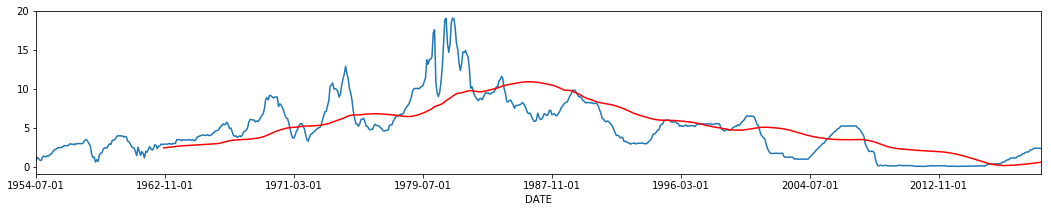

In [79]:
# tail-rolling average transform
rolling = s.rolling(window=100)
rolling_mean = rolling.mean()
s.plot()
rolling_mean.plot(color='red')

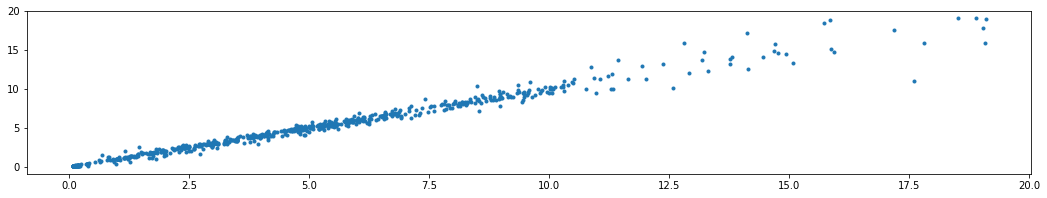

In [80]:
# create a scatter plot
# lag_plot(s)
step = 1
x = X[:-step]
y = X[step:]
plt.plot(x,y,'.')

In [81]:
# X = X+np.random.normal(0,1,X.shape[0])

In [82]:
# prepare problem
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = []

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = np.sqrt(mean_squared_error(test, predictions))

In [83]:
print('RMSE: %.3f' % rmse)

RMSE: 0.638


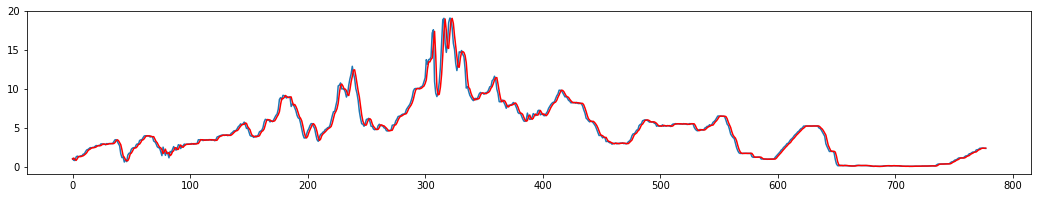

In [85]:
plt.plot(test)
plt.plot(predictions, color='red')
# plt.xlim(100,110)

# Convolution

In [98]:
conv = [-1, 1, 0]
np.convolve([1, 2, 3, 4, 5, 6], conv[::-1])

array([ 1,  1,  1,  1,  1,  1, -6])

# Smoothing

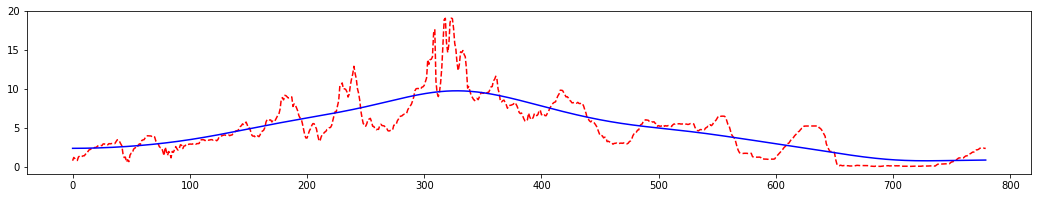

In [105]:
Xp = gaussian_filter1d(X, 50)
plt.plot(X,'r--')
plt.plot(Xp,'b')


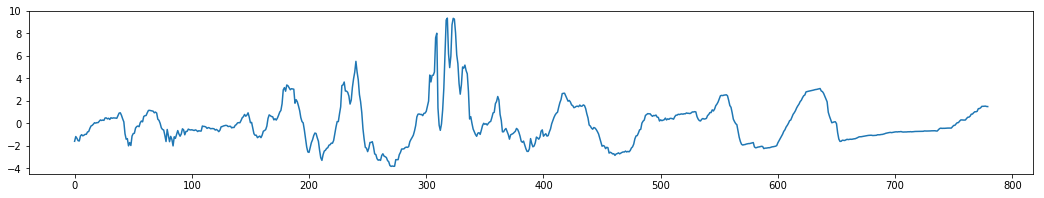

In [106]:
plt.plot(X-Xp)

# Fourier transform`

# $\frac{1}{2\pi} \int_{0}^{\infty} \! 2F(\omega) \mathrm{e}^{i\omega t}\, d\omega$

In [107]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = np.arange(0.0, 3.0, 1/f_s)
x = 5 * np.sin(2 * np.pi * f * time) + 2 * np.sin(10 * 2 * np.pi * f * time)

Text(0, 0.5, 'x')

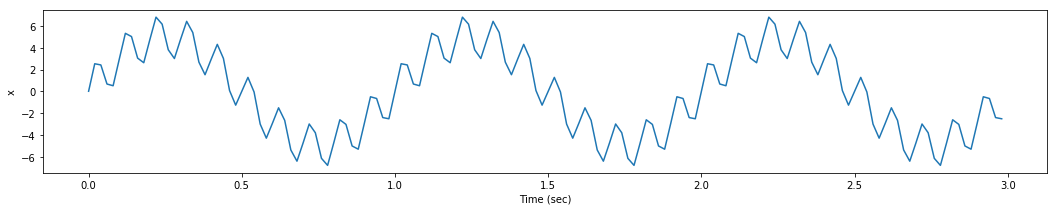

In [108]:
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

In [63]:
fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/f_s)
print(n)
print(freq)

150
[  0.           0.33333333   0.66666667   1.           1.33333333
   1.66666667   2.           2.33333333   2.66666667   3.
   3.33333333   3.66666667   4.           4.33333333   4.66666667
   5.           5.33333333   5.66666667   6.           6.33333333
   6.66666667   7.           7.33333333   7.66666667   8.
   8.33333333   8.66666667   9.           9.33333333   9.66666667
  10.          10.33333333  10.66666667  11.          11.33333333
  11.66666667  12.          12.33333333  12.66666667  13.
  13.33333333  13.66666667  14.          14.33333333  14.66666667
  15.          15.33333333  15.66666667  16.          16.33333333
  16.66666667  17.          17.33333333  17.66666667  18.
  18.33333333  18.66666667  19.          19.33333333  19.66666667
  20.          20.33333333  20.66666667  21.          21.33333333
  21.66666667  22.          22.33333333  22.66666667  23.
  23.33333333  23.66666667  24.          24.33333333  24.66666667
 -25.         -24.66666667 -24.33333333 -24.  

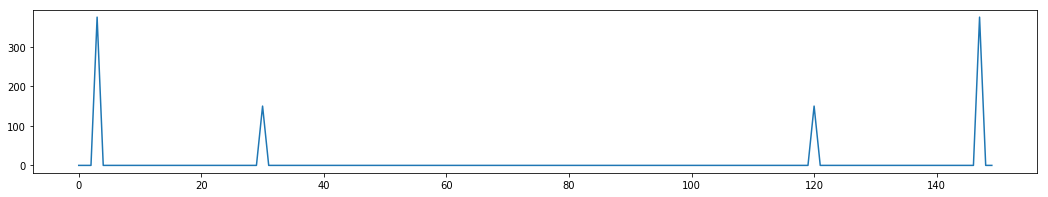

In [64]:
plt.plot(np.abs(fft_x))

Text(0.5, 0, 'Frequency (Hz)')

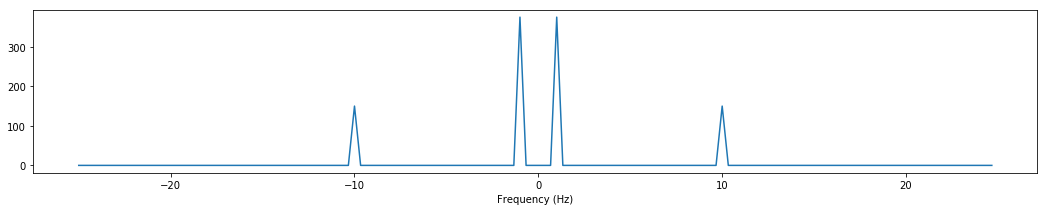

In [65]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(freq)

plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frequency (Hz)")

Text(0, 0.5, 'Amplitude')

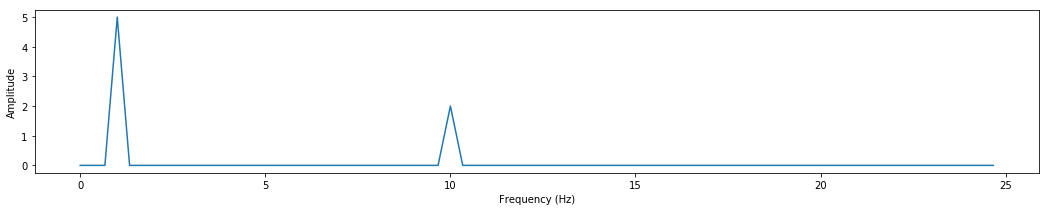

In [66]:
half_n = int(np.ceil(n/2.0))
fft_x_half = (2.0 / n) * fft_x[:half_n]
freq_half = freq[:half_n]

plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")